# AI Practical Assessment (JRP)

Author: Amir Fawwaz

Affliation: HT Consulting (Asia) Sdn. Bhd., Kelana Jaya, Malaysia

Published: 29 July 2024

## Question

Using alexnet as model, train suitable classifier and later compare with Support Vector Machine (SVM). Training shall be done using the following dataset:

- [cifar100](https://keras.io/api/datasets/cifar100/)
- [fruit-data](https://1drv.ms/f/s!ArxRwcm_oQh9gZZ6RKD8azw49Fbrzw?e=zbotuC)
- [potato-data](https://1drv.ms/f/s!ArxRwcm_oQh9gZZ6RKD8azw49Fbrzw?e=zbotuC)

Final evaluation will be perform using usualy confusion matrix.

### CIFAR-100 Classification with AlexNET

To solve CIFAR 100, we can refer to CIFAR 10 problem because it was for small classes (10 only compare to 100). Let's try solve following example from

- [reference 1](https://gist.github.com/josefelixsandoval/fad43016c9bca96ea529a2ff4340eba3)
- [reference_2](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/)

## AlexNet

AlexNet was much larger than previous convolutional neural network (CNN) used for computer vision task LeNet.

<table>
  <tr><td>
    <img src="https://learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png"
         alt="Architecture of Alexnet"  width="650">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf">Architecture of Alexnet</a><br/>&nbsp;
  </td></tr>
</table>

In [1]:
!pip install scikit-learn-intelex

In [2]:
# Import Libraries
import tensorflow as tf
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.svm import SVC

# Helper libraries
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

print('The tensorflow version is {}.'.format(tf.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The tensorflow version is 2.15.0.
The scikit-learn version is 1.3.2.


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# load dataset
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 10s 0us/step


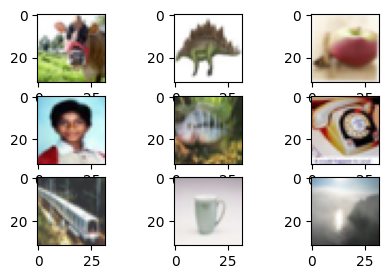

In [4]:
# Inspect image from dataset
plt.figure(figsize=(5,3))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [4]:
# Normalize pixel values to be between 0 and 1
train_images, val_images = train_images/255.0, val_images/255.0

In [5]:
# Split the data into train, validation, and test sets
total_samples = len(train_images)
train_samples = int(0.8 * total_samples)
test_samples = int(0.1 * total_samples)

test_images = train_images[train_samples:train_samples+test_samples]
test_labels = train_labels[train_samples:train_samples+test_samples]

train_images = train_images[:train_samples]
train_labels = train_labels[:train_samples]

In [6]:
print("Dataset split complete.")
print(f"Training set size: {train_images.shape[0]}")
print(f"Validation set size: {val_images.shape[0]}")
print(f"Test set size: {test_images.shape[0]}")

Dataset split complete.
Training set size: 40000
Validation set size: 10000
Test set size: 5000


In [8]:
# define alexnet model
def my_alexnet(num_classes):
    """ model is written in functional API way"""
    inputs = tf.keras.layers.Input(shape=(32, 32, 3), name = 'input')

    # First Convolutional Layer
    x = tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

    # Second Convolutional Layer
    x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

    # Third Convolutional Layer
    x = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)

    # Fourth Convolutional Layer
    x = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)

    # Fifth Convolutional Layer
    x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

    # Flatten the output for dense layers
    x = tf.keras.layers.Flatten()(x)

    # Fully Connected Layers
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    # Output Layer
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="alexnet")
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [9]:
# Create the model & display model "stack"
model = my_alexnet(100)
model.summary()

Model: "alexnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 96)        2688      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 256)       221440    
                                                                 
 batch_normalization_1 (Bat  (None, 15, 15, 256)       1024

In [10]:
%time history = model.fit(train_images, train_labels, epochs=35, validation_data=(val_images, val_labels), batch_size=128, verbose = 0)

CPU times: user 6min 13s, sys: 10.5 s, total: 6min 24s
Wall time: 8min 25s


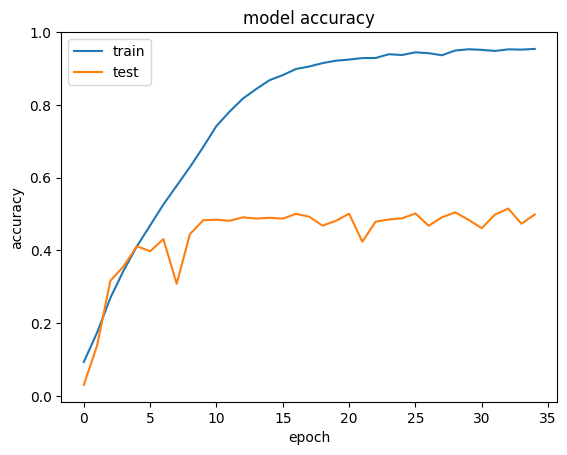

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f"\nTest accuracy:' {test_acc*100:.2f}%")

157/157 - 1s - loss: 2.9972 - accuracy: 0.5036 - 895ms/epoch - 6ms/step

Test accuracy:' 50.36%


---

## _**Observation 1**_

1. From model accuracy & model loss plot above, we can observed that the trained model suffered an overfitting! Our model not generalizing well to the validation set.
2. model training took 8min 25s
3. Model accuracy on _test data_ only give us ~ 50.36% accuracy only. And this is poor!

Thus to improve the model performance, let's try:

- implement small data augmentation

In [14]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, zoom_range=0.1)
train_generator = data_generator.flow(train_images, train_labels, batch_size)
steps_per_epoch = train_images.shape[0] // batch_size
%time r = model.fit_generator(train_generator, validation_data=(val_images, val_labels), steps_per_epoch=steps_per_epoch, epochs=25, verbose = 0)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


CPU times: user 20min 49s, sys: 16.6 s, total: 21min 6s
Wall time: 15min 30s


In [15]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f"\nTest accuracy:' {test_acc*100:.2f}%")

157/157 - 1s - loss: 1.7497 - accuracy: 0.5622 - 798ms/epoch - 5ms/step

Test accuracy:' 56.22%


## _**Observation 2**_

1. From model accuracy & model loss plot above, we can observed that the trained model still overfitting but improve before data augmentation!
2. Model accuracy on _test data_ improved from 50.36% accuracy only to 56.22%

Thus to improve the model performance :

- implement small data augmentation
- add more regularization to neural network
- implement learning rate scheduling

For our implementation, we only consider `model.evaluate` for testing. Confusion matrix or ROC plot will not be performed.

### CIFAR-100 Classification with Support Vector Machine

Now let's perform same classification using SVM from scikit package.

From documentation, `Scikit-learn` provides three classes namely SVC, NuSVC and LinearSVC which can perform multiclass-class classification.

Since SVM is part of "classic machine learning" where it does not have automatic "feature extraction" embedded in the algorithm,
training time scales quadratically with the number of samples, training on _**subsets**_ of the data should be much quicker.

Thus we need to used smaller data for SVM. If we want to utilize all, _**dimension reduction**_ like PCA have to implemented first before feeding the data into SVM.

Note: if you are using cloud platform (e.g. google collab or kaggle), it is advice to use subset sampling. If you're using personal laptop or server, you can run SVM for all dataset given that you have "enough" (32GB) memory.

In [3]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

In [4]:
# Combine train and test sets to redistribute
X = np.concatenate((train_images, test_images), axis=0)
y = np.concatenate((train_labels, test_labels), axis=0)

# Reshape (flatten) as part of dimensionality reduction (from (60000, 32, 32, 3) to (60000, 3072)) and normalize the features
X = X.reshape((X.shape[0], -1))  # Flatten the images
X = X / 255.0  # Normalize pixel values to [0, 1]

# Split the data into training (80%), validation (10%), and test (10%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.951, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.45, random_state=42)

print("Dataset split complete.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Dataset split complete.
Training set size: 1617
Validation set size: 1323
Test set size: 57060


In [5]:
# Scale the features
scaler = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Train SVM model
print("Training SVM model...")
svm_model = SVC(kernel='rbf', C=1.0, random_state=42, verbose=True)
%time svm_model.fit(X_val_scaled, y_val.ravel())

Training SVM model...
CPU times: user 12.4 s, sys: 14.4 s, total: 26.8 s
Wall time: 15.8 s


SVC(random_state=42, verbose=True)

In [7]:
# Test the model
print("Testing the model...")
%time test_predictions = svm_model.predict(X_val_scaled)
test_accuracy = accuracy_score(y_val, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Testing the model...
CPU times: user 1min 46s, sys: 1min 1s, total: 2min 48s
Wall time: 1min 39s
Test Accuracy: 55.86%


Similar like AlexNer,for our implementation, we only consider `evaluate` for testing. Confusion matrix or ROC plot will not be performed.

## Final Remark

We have compare 2 type of algorithm/approach to classify image data from CIFAR-100 dataset. AlexNet model evaluation from _test data_ gives 56.22% accuracy and SVM gives 55.86%.

## Marking Note

Total Mark  = [15 marks]

Estimated time = 45 - 60 minutes

Breakdown:
- format: [1 marks]
- Load Data: [2 marks]
- EDA: [1 marks]*
- Model/Algorithm: [1 marks]
- Successful training: [1 marks]
- Model Evaluation: [5 marks]
- Conclusion/Recommendation: [5 marks]

$^*$optional